
*Import the libraries*


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

In [55]:
import warnings
warnings.filterwarnings('ignore')

**Read the data from csv file and understand the data**

In [56]:
data = pd.read_csv('creditcard.csv')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [57]:
print(data.shape[0],data.shape[1])

284807 31


In [58]:
data.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

*Look for any null values*

In [61]:
data.isnull().sum().max()

0

*Understand the distribution of fraud and normal transactions*

In [62]:
print('Normal Transactions count:',data['Class'].value_counts().values[0])
print('Fraudulent Transactions count:',data['Class'].value_counts().values[1])

Normal Transactions count: 284315
Fraudulent Transactions count: 492


In [63]:
print('Normal transactions are',(data['Class'].value_counts().values[0]/data.shape[0])*100,'% of the dataset')
print('Fraudulent transactions are',(data['Class'].value_counts().values[1]/data.shape[0])*100,'% of the dataset')

Normal transactions are 99.82725143693798 % of the dataset
Fraudulent transactions are 0.1727485630620034 % of the dataset


 **Exploratory analysis** 

*Visualization of Transaction class distribution*

Text(0, 0.5, 'Frequency')

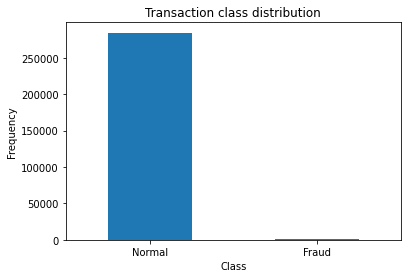

In [64]:
count_class=pd.value_counts(data['Class'],sort=True)
count_class.plot(kind='bar',rot=0)
plt.title('Transaction class distribution')
LABELS=['Normal','Fraud']
plt.xticks(range(2),LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')

*Visualization of Amount and Time Distribution*

(0.0, 172792.0)

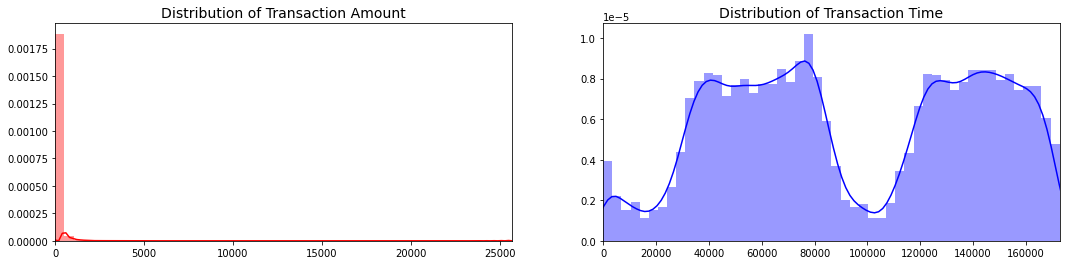

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


*Visualization of Amount and Time by class*

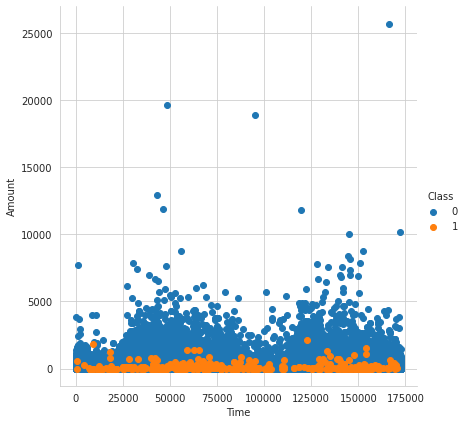

In [66]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

From the above graphs,we can conclude that the fraud transactions are evenly distributed throughout time.
Also,there are frauds only on the transactions whuch have transaction amount approximately less than 2500.Transactions which have transaction amount approximately above 2500 have no fraud.

*Get sense of the fraud and normal transaction amount*

In [67]:
fraud=data[data['Class']==1]
normal=data[data['Class']==0]
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [68]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

**Normalization of data**

*Scaling is done to normalise the data within a particular range.*

In [69]:
#Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
#RobustScaler reduces the influence of outliers
from sklearn.preprocessing import StandardScaler,RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = std_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [70]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)


*Since most of the transactions are non-fraud,using this dataframe for the further analysis would lead to a lot of errors.Hence,we need to create a sub sample of data that has an equal amount of fraud and non-fraud cases.This is to avoid over-fitting.*


In [71]:
data = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = data.loc[data['Class'] == 1]
non_fraud_df = data.loc[data['Class'] == 0][:492]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
9800,1.927639,-0.824634,-4.538653,-0.672919,0.934677,-2.588147,-3.465292,1.340718,-0.027617,-3.304568,4.851260,-2.879614,-0.292353,-0.527882,2.314787,0.074457,-2.119204,-0.490385,1.005881,0.261339,-0.182982,-2.621127,2.492449,-0.383959,-1.924213,0.620426,0.668034,-0.750027,1.194460,-1.043734,0
108708,1.351555,-0.160469,-3.170818,0.185735,-3.399852,3.761155,-2.148047,-1.598944,-2.519565,1.316215,-2.400106,-4.993417,4.447192,-5.293760,-1.419578,-6.425276,0.914083,-3.515197,-6.347453,-0.903512,1.191606,1.932254,1.092051,-0.041080,0.904395,0.180016,0.049970,-0.257100,0.859282,0.225924,1
144493,-0.333239,0.017270,-1.087213,1.379503,1.800401,0.775619,-0.205713,-0.090909,0.122422,0.576344,-0.775505,-0.505636,-0.225620,0.438092,0.682012,0.371380,1.558195,-0.214083,0.169081,-0.420325,0.124625,0.112924,-0.099608,-0.298793,-0.089791,0.056174,0.157685,-0.443143,0.235687,0.072925,0
189587,-0.081759,0.514327,0.909124,1.337658,-4.484728,3.245358,-0.417809,-0.762119,-2.506349,0.694164,-0.467556,-4.565260,3.612645,-3.171937,-0.400046,-8.569454,-1.614831,-2.388208,-2.577464,0.092679,0.098242,0.445573,0.586829,0.594078,-0.252120,0.325439,0.562766,-0.256278,0.652674,0.319879,1
45203,-0.349231,-0.498655,-2.524012,2.098152,-4.946075,6.456588,3.173921,-3.058806,-0.184710,-0.390420,-3.649812,-4.077585,4.389214,-5.849558,-0.750964,-11.583898,0.838750,-1.461029,0.635694,0.390150,-1.063028,-0.162797,0.027935,0.220366,0.976348,-0.290539,1.161002,0.663954,0.456023,-0.405682,1


*Visualization of Transaction Class Distribution after creating the subsample*

Text(0.5, 0, 'Class')

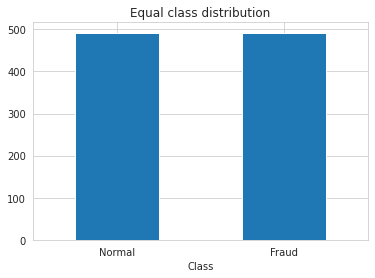

In [72]:
count_class=pd.value_counts(new_df['Class'],sort=True)
count_class.plot(kind='bar',rot=0)
plt.title('Equal class distribution')
LABELS=['Normal','Fraud']
plt.xticks(range(2),LABELS)
plt.xlabel('Class')


**Visualization of correlations**

*Use of heatmap to find the correlations*

Text(0.5, 1.0, 'Heatmap of Correlation')

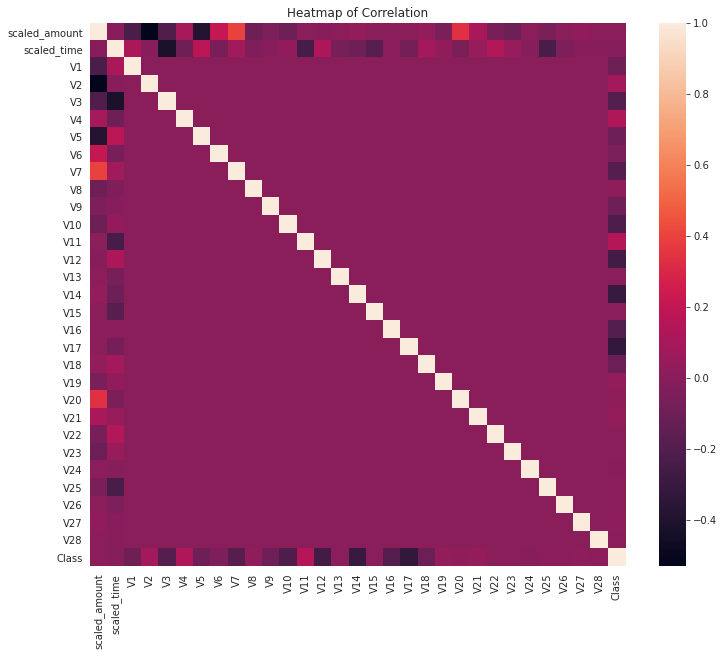

In [73]:
plt.figure(figsize=(12,10))
heat=sns.heatmap(data.corr())
plt.title('Heatmap of Correlation')

From the above heatmap,we can conclude that V10,V12,V14 and V17 are highly negatively correlated to class and V2,V4,V11 and V19 are highly positively correalted to class.

*Visualization of correlations using boxplot*

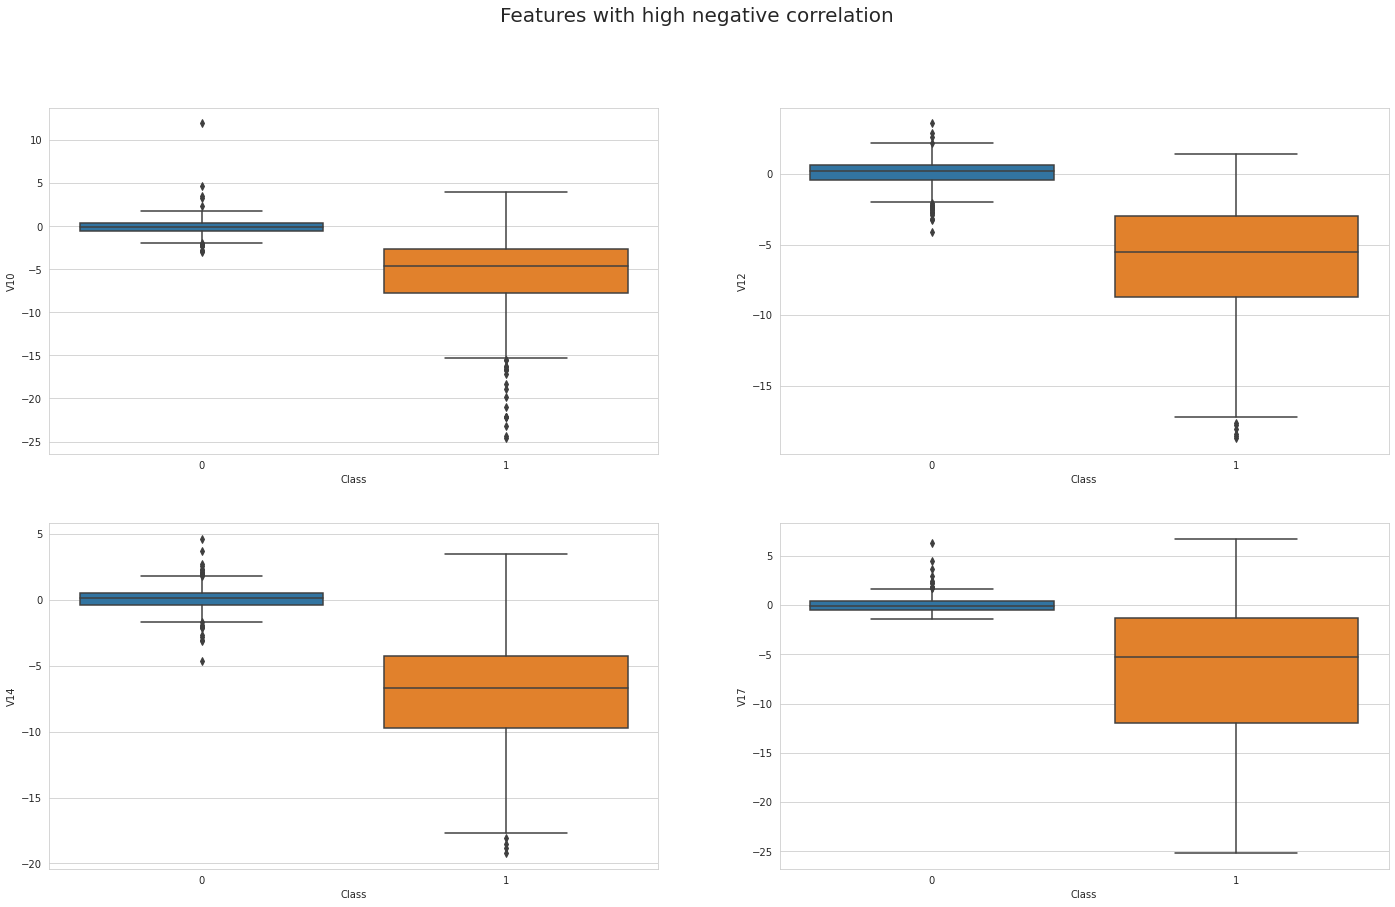

In [74]:
f,ax=plt.subplots(2,2,figsize=(24,14))
f.suptitle('Features with high negative correlation',size=20)
sns.boxplot(x='Class',y='V10',data=new_df,ax=ax[0,0])
sns.boxplot(x='Class',y='V12',data=new_df,ax=ax[0,1])
sns.boxplot(x='Class',y='V14',data=new_df,ax=ax[1,0])
sns.boxplot(x='Class',y='V17',data=new_df,ax=ax[1,1])


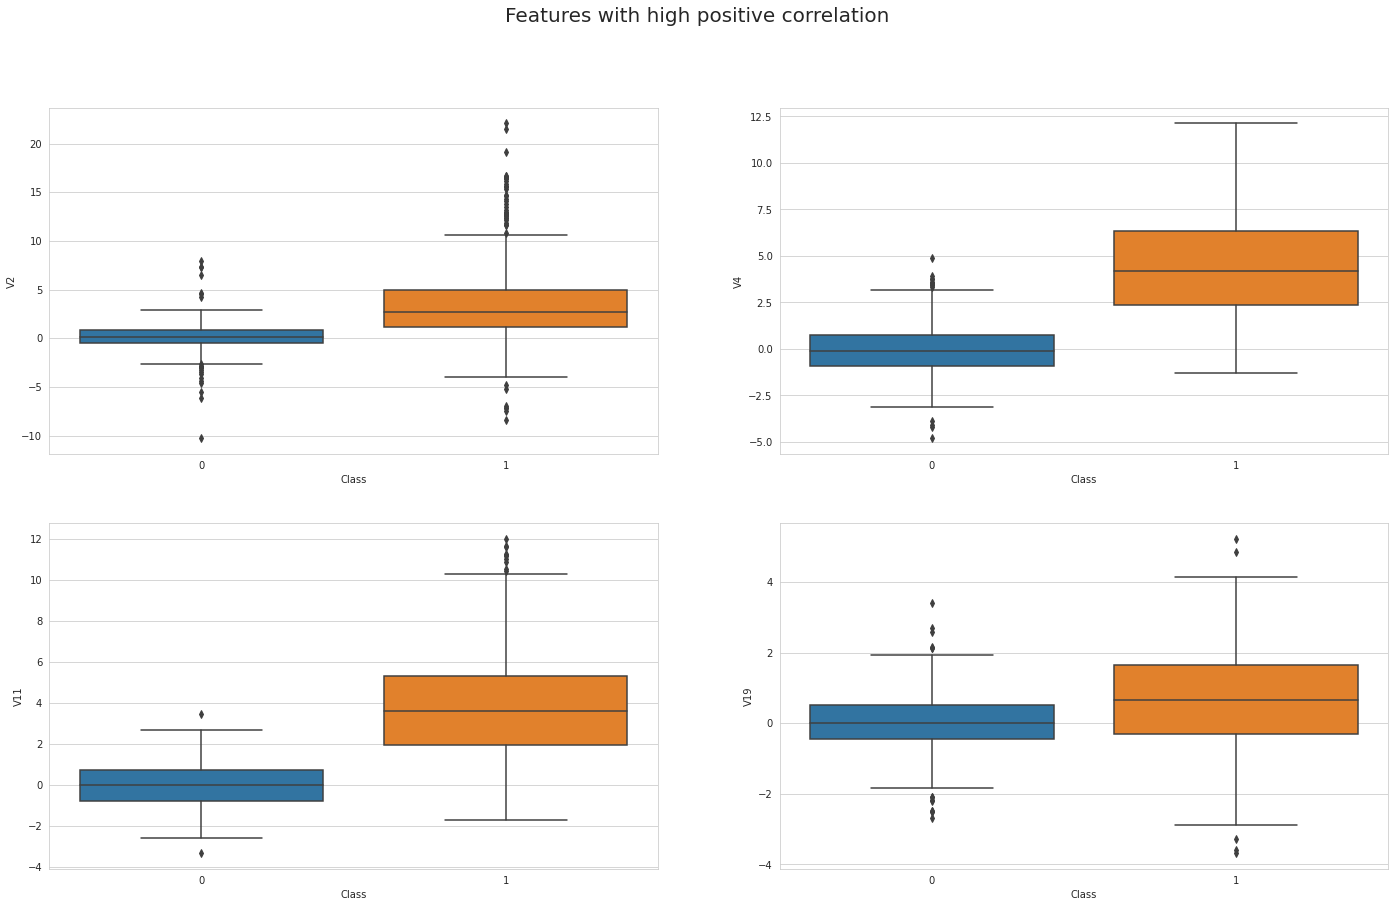

In [75]:
f,ax=plt.subplots(2,2,figsize=(24,14))
f.suptitle('Features with high positive correlation',size=20)
sns.boxplot(x='Class',y='V2',data=new_df,ax=ax[0,0])
sns.boxplot(x='Class',y='V4',data=new_df,ax=ax[0,1])
sns.boxplot(x='Class',y='V11',data=new_df,ax=ax[1,0])
sns.boxplot(x='Class',y='V19',data=new_df,ax=ax[1,1])

*Remove the extreme outliers from features that have a high correlation with our classes.*


In [76]:
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25
v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)


v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)



v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off

new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)



*Classifier:*An algorithm that maps the input data to a specific category.Classification is a type of supervised learning.
</br>The training data is used to make sure the machine recognizes patterns in the data and the test data is used only to access performance of model.


In [77]:
X=new_df.drop('Class',axis=1) 
y=new_df['Class']

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


**Model Architecture**

*Import the required classifiers*

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [81]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
#Support Vector Classifier
svc=SVC()
svc.fit(X_train,y_train)
#K-nearest neighbors
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
#Random Forest Classifier
RDF_Classifier=RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_train,y_train)
#DecisionTreeClassifier
DecisionTreeClassifier= DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_train,y_train)




DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Model Evaluation and Prediction**

In [82]:
models_list=[('Logistic Regression',logmodel),('SVC',svc),('KNeighborsClassifier',knn),('RFC',RDF_Classifier),('DecisionTreeClassifier',DecisionTreeClassifier)]
models=[j for j in models_list]
print()
#print('===========================Model Evaluation Results================================')
for i,v in models:
      print('==========================={}=========================================='.format(i))
      a=cross_val_score(v, X_train, y_train, cv=5)
      print('Cross validation score=',a.mean())
     


===========================Logistic Regression==========================================
Cross validation score= 0.9339055420006972
===========================SVC==========================================
Cross validation score= 0.9299494597420704
===========================KNeighborsClassifier==========================================
Cross validation score= 0.9286336702683862
===========================RFC==========================================
Cross validation score= 0.9339229696758451
===========================DecisionTreeClassifier==========================================
Cross validation score= 0.8863889857093064


*Test Models*

In [83]:

models_list=[('Logistic Regression',logmodel),('SVC',svc),('KNeighborsClassifier',knn),('RFC',RDF_Classifier),('DecisionTreeClassifier',DecisionTreeClassifier)]
models=[j for j in models_list]
print()
print('===========================Model Test Results================================')
for i,v in models:
      print('==========================={}=========================================='.format(i))
      pred_test = v.predict(X_test)
      print('Accuracy =',accuracy_score(y_test,pred_test))
      print('Confusion Matrix')
      print(confusion_matrix(y_test,pred_test))
      print('Classification Report')
      print(classification_report(y_test,pred_test))


===========================Model Test Results================================
===========================Logistic Regression==========================================
Accuracy = 0.9736842105263158
Confusion Matrix
[[88  2]
 [ 3 97]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.98      0.97      0.97       100

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190

===========================SVC==========================================
Accuracy = 0.9578947368421052
Confusion Matrix
[[89  1]
 [ 7 93]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        90
           1       0.99      0.93      0.96       100

    accuracy                           0.96       190
   macro avg       0.96      0.96     